In [9]:
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(open("../shared-resources/jupyter.css", "r").read()))
display(HTML("<style>.container { width:100% !important; }</style>"))
import mpld3
%matplotlib inline

In [22]:
df = pd.read_csv('../shared-resources/time_series/time-series-2010.csv', index_col=0, header=0, parse_dates=True)
df.head()

,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,ibm_adj_close,ibm_volume,ge_open,ge_high,ge_low,ge_close,ge_adj_close,ge_volume,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume,open,high,low,close,2010-07-19 00:00:00
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000,NaN
2010-07-20,1.000043,1.028404,1.006732,1.033056,1.033056,0.891024,0.955701,0.970701,0.957623,0.975037,0.975037,1.947572,0.980874,1.018318,0.992398,1.021888,1.021888,1.371006,1.022461,0.982022,0.958413,0.926518,0.926518,0.734084,0.972067,1.012086,1.001711,1.025694,1.025694,1.049267,0.888889,0.888889,0.875,0.875,NaN
2010-07-21,1.049869,1.034174,1.039146,1.024282,1.024282,0.720736,0.982669,0.970241,0.970788,0.965175,0.965174,1.027049,1.032104,1.031208,1.011748,1.015048,1.015048,1.325004,0.966776,0.939326,0.932122,0.922866,0.922866,0.503720,1.060869,1.061109,1.060100,1.035263,1.035263,1.157342,0.777778,0.888889,0.875,1.000,NaN
2010-07-22,1.048199,1.041158,1.054555,1.039963,1.039963,0.471975,0.981736,0.980058,0.981927,0.982125,0.982125,0.823618,1.030055,1.037313,1.034554,1.040356,1.040356,1.310307,0.959289,0.955056,0.973709,0.958466,0.958466,0.385200,1.031215,1.040499,1.065568,1.054728,1.054727,0.629900,0.888889,0.888889,0.625,0.625,NaN
2010-07-23,1.042862,1.044586,1.049156,1.051225,1.051225,0.497631,0.989353,0.987882,0.989328,0.989136,0.989136,0.605345,1.038934,1.075305,1.038701,1.074555,1.074555,2.297298,0.991577,0.968989,1.006692,0.971702,0.971702,0.262859,1.028854,1.042020,1.069616,1.058474,1.058474,0.520644,0.555556,0.777778,0.625,0.750,NaN


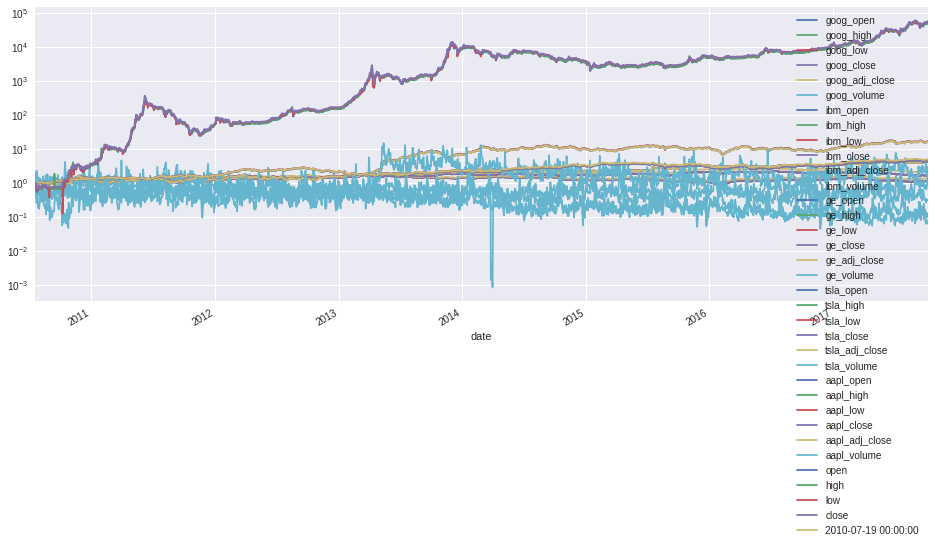

In [14]:
ax = df.plot(logy=True, figsize=(16, 6))

In [26]:
y = df['close'].iloc[1:]
X = df.iloc[:-1]
X.isnull().sum().values
del X[list(X.columns)[-1]]
X.head()
print(y.head())

date
2010-07-20    0.875
2010-07-21    1.000
2010-07-22    0.625
2010-07-23    0.750
2010-07-26    0.750
Name: close, dtype: float64


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.99574764174158603

In [34]:
df['pred_btc_close'] = list(lr.predict(X)) + [pd.np.nan]
df['tomorrow'] = list(y) + [pd.np.nan]


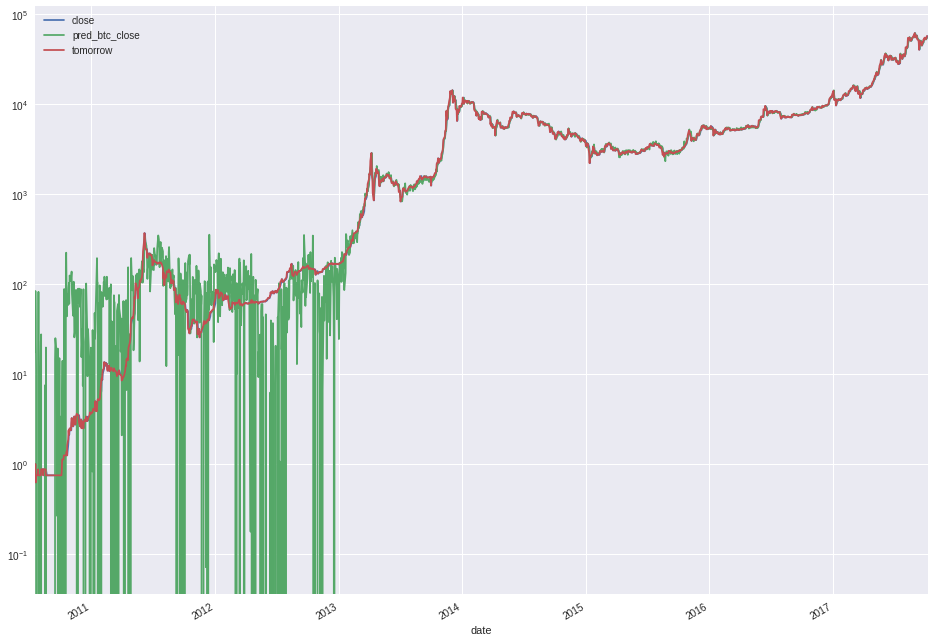

In [38]:
ax = df[['close', 'pred_btc_close', 'tomorrow']].plot(logy=True, figsize=(16, 12))

In [39]:
mpld3.display(ax.figure)

In [40]:
with open('../shared-resources/btc.html', 'w') as fout:
    fout.write(mpld3.fig_to_html(ax.figure))

In [66]:
X = df[list(df.columns)[:-3]].iloc[:-1]
y = df['close'].iloc[1:]
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

X = pd.concat([X, X.diff()], axis=1)
y = y.diff()
print(X.shape)
print(y.shape)

X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

(1820, 68)
(1820,)


In [67]:
X.describe()

,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,ibm_adj_close,ibm_volume,ge_open,ge_high,ge_low,ge_close,ge_adj_close,ge_volume,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume,open,high,low,close,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,ibm_adj_close,ibm_volume,ge_open,ge_high,ge_low,ge_close,ge_adj_close,ge_volume,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume,open,high,low,close
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,2.267521,2.242657,2.265616,2.242066,2.242066,0.388666,1.326838,1.318633,1.321453,1.316070,1.419059,0.538278,1.648092,1.649199,1.654808,1.650623,1.890179,0.906599,6.964747,6.801399,6.987152,6.792191,6.792191,1.789327,2.515536,2.536742,2.599428,2.559251,2.696632,0.317097,5019.781746,5177.575397,5472.148695,5670.915453,0.001771,0.001758,0.001780,0.001774,0.001774,-0.000479,0.000077,0.000069,0.000077,0.000071,0.000196,-0.000378,0.000367,0.000366,0.000367,0.000367,0.000621,-0.000093,0.008534,0.008348,0.008707,0.008405,0.008405,0.000400,0.001837,0.001845,0.001933,0.001884,0.002155,-0.000512,26.404374,26.982836,29.572567,30.031336
std,0.905851,0.894337,0.906558,0.895985,0.895985,0.297163,0.170842,0.169262,0.170722,0.169299,0.165483,0.260942,0.319255,0.317749,0.323128,0.320054,0.479454,0.563432,4.934704,4.803498,4.964256,4.811607,4.811607,1.711352,0.880040,0.885110,0.911788,0.895477,1.028699,0.214872,8499.173585,8811.285211,9225.609083,9622.796443,0.034229,0.030143,0.031421,0.032756,0.032756,0.220946,0.014847,0.013630,0.014506,0.015382,0.016433,0.256921,0.020166,0.018305,0.021214,0.019831,0.022655,0.451564,0.235110,0.194094,0.222995,0.216534,0.216534,1.140826,0.044201,0.035273,0.041580,0.040114,0.042212,0.135563,574.920367,504.419319,664.815921,641.958156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,2.294498,2.270430,2.292761,2.269240,2.269240,0.327016,1.318411,1.311896,1.312612,1.310193,1.433875,0.475663,1.700478,1.702510,1.704561,1.700410,1.986323,0.779384,8.594290,8.402697,8.620459,8.374258,8.374258,1.395737,2.479970,2.500940,2.560434,2.525837,2.545766,0.267378,2623.944444,2660.277778,2900.250000,2955.000000,0.001453,0.001171,0.002426,0.000987,0.000987,-0.005175,0.000466,0.000077,0.001013,0.000231,0.000363,-0.004590,0.000683,-0.000678,0.000691,0.000684,0.000734,-0.008434,0.003276,0.000000,0.008126,0.003651,0.003651,-0.023125,0.002801,0.001401,0.004048,0.001710,0.001886,-0.004220,0.333333,0.000000,1.125000,0.250000
75%,3.064247,3.039646,3.053534,3.029228,3.029228,0.509285,1.475499,1.464105,1.468587,1.462594,1.551144,0.612084,1.872951,1.871777,1.882688,1.874829,2.229618,1.040923,10.765208,10.536854,10.827557,10.498174,10.498174,2.402584,3.152703,3.186669,3.258754,3.210970,3.457066,0.418303,6397.750000,6482.861111,7003.906250,7187.

In [68]:
y.describe()

count    1819.000000
mean       31.599918
std       645.361273
            ...     
50%         0.250000
75%        42.250000
max      8789.125000
Name: close, Length: 8, dtype: float64

In [69]:
y = y.iloc[1:]
X = X.iloc[1:]
print(X.shape)
print(y.isnull().sum())

(1819, 68)
0


In [70]:
ynull = y[y.isnull()]
ynull

Series([], Name: close, dtype: float64)

In [77]:
y


date
2010-07-21       0.125
2010-07-22      -0.375
2010-07-23       0.125
                ...   
2017-10-05    1210.375
2017-10-06     593.625
2017-10-09    2853.125
Name: close, Length: 1819, dtype: float64

In [85]:
y_pred = lr.predict(X)
df_pred = pd.DataFrame()
df_pred['pred_diff'] = y_pred
df_pred
print(y)
df_pred['true_diff'] = y.values
df_pred
y_pred[pd.isnull(y_pred)]
df_pred.isnull()

date
2010-07-21       0.125
2010-07-22      -0.375
2010-07-23       0.125
                ...   
2017-10-05    1210.375
2017-10-06     593.625
2017-10-09    2853.125
Name: close, Length: 1819, dtype: float64


,pred_diff,true_diff
0,False,False
1,False,False
2,False,False
...,...,...
1816,False,False
1817,False,False
1818,False,False


In [87]:
ax = df_pred.plot(logy=True, figsize=(16,8))
mpld3.display(ax.figure)

In [88]:
with open('../shared-resources/btc_change.html', 'w') as fout:
    fout.write(mpld3.fig_to_html(ax.figure))